# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from scipy.stats import ttest_ind
from numpy.random import seed
medical = pd.read_csv('insurance2.csv')

In [3]:
medical.shape

(1338, 8)

In [4]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__ As seen below the distribution does not approximate a normal distribution.  In fact it looks more like an exponential distribution.  As such, the mean is heavily influenced by the upper tail of the values, and the standard deviation is quite large.  

Mean: $13270.42
Standard deviation: $12110.01


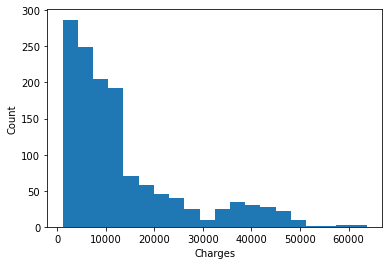

In [18]:
_ = plt.hist(medical.charges, bins=20)
_ = plt.xlabel('Charges')
_ = plt.ylabel('Count')
mean_charges = medical.charges.mean()
mean_std = medical.charges.std(ddof=1)
print('Mean: $%6.2f'%mean_charges)
print('Standard deviation: $%6.2f'% mean_std)

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__ I'd calculate a 95% confidence interval for the mean based on our sample size.  Because we have an unknown population standard deviation we'll use the t-statistic.  

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__ A two-sided interval is appropriate in this case.  

In [21]:
# Let's use the t-statistic now
t_margin_of_error = t.ppf(0.975, df=1337, loc=mean_charges, scale=mean_std/np.sqrt(1338)) - mean_charges
print(t_margin_of_error)

649.4682309486125


In [22]:
# Confidence interval is just the mean - margin of error to the mean + margin of error
print('95 percent confidence interval using t-statistic is between %6.2f cm and %6.2f cm.' % \
      (mean_charges - t_margin_of_error, mean_charges + t_margin_of_error))

95 percent confidence interval using t-statistic is between 12620.95 cm and 13919.89 cm.


Administrator can rest assured that if we took more samples of the data, 95% of them would have a mean within this confidence interval.  Therefore it is very unlikely that the mean has fallen below $12000.

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__ The null hypothesis is that both groups are paying the same amount.  The alternative hypothesis is that both groups are paying different amounts.  

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ The T-statistic is nearly -12.  This is a very large t-statistic which will correspond to a very small p-value, so we should reject the null hypothesis, which means that the two groups are charged different amounts.

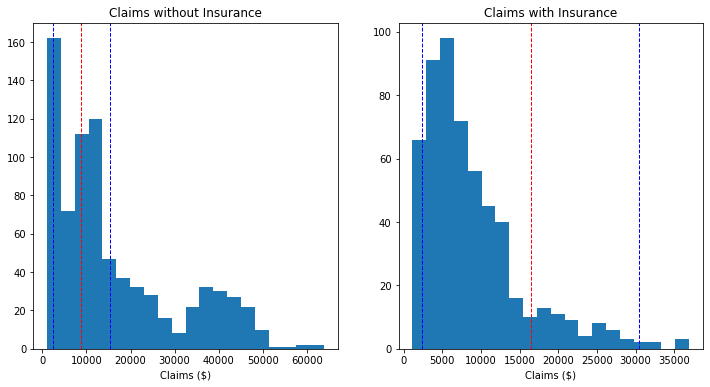

In [60]:
# Let's compare claims with and without insurance
# First let's calculate sample size, mean and standard deviation of our sample
# 0 is without insurance
claims_0 = medical[medical['insuranceclaim']==0]['charges']
n0 = len(claims_0)
mean_0 = claims_0.mean()
std_0 = claims_0.std(ddof=1)

# 1 is with insurance
claims_1 = medical[medical['insuranceclaim']==1]['charges']
n1 = len(claims_1)
mean_1 = claims_1.mean()
std_1 = claims_1.std(ddof=1)

# Now let's plot the histograms side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
ax1.hist(medical[medical['insuranceclaim']==1]['charges'], bins=20)
ax1.set_title('Claims without Insurance')
ax1.set_xlabel('Claims ($)')
ax1.axvline(mean_0, color='r', linestyle='dashed', linewidth=1)
ax1.axvline(mean_0 - std_0, color='b', linestyle='dashed', linewidth=1)
ax1.axvline(mean_0 + std_0, color='b', linestyle='dashed', linewidth=1)

ax2.hist(medical[medical['insuranceclaim']==0]['charges'], bins=20)
ax2.set_title('Claims with Insurance')
ax2.set_xlabel('Claims ($)')
ax2.axvline(mean_1, color='r', linestyle='dashed', linewidth=1)
ax2.axvline(mean_1 - std_1, color='b', linestyle='dashed', linewidth=1)
ax2.axvline(mean_1 + std_1, color='b', linestyle='dashed', linewidth=1);

Wow, we can see that these two populations are wildly different in terms of the charges.  Let's see if this difference is statistically significant. 

In [76]:
# Calculated pooled standard deviation
std_p = np.sqrt( ((n0-1)*std_0**2 + (n1-1)*std_1**2)/(n0+n1-2))

# Calculated t-statistics
t_stat_man = (mean_0 - mean_1) / (std_p*np.sqrt(1/n0 + 1/n1));
print("Manual T-statistic: ", t_stat_man)

Manual T-statistic:  -11.89329903087671


In [72]:
# Now let's calculate it using scipy.stats
t_stat_scipy, p_value_scipy = ttest_ind(claims_0, claims_1)
print("T-statistic from Scipy: ", t_stat_scipy)
print("P-value from Scipy: ", p_value_scipy)

T-statistic from Scipy:  -11.893299030876712
P-value from Scipy:  4.461230231620717e-31


Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__ No I don't see an equvalient function for a z-test.  I assume this is because in the real world we never know the variance of the entire population, and so we always use the t-test.  

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test